Since the beginning of the COVID-19 pandemic in early March 2020, all the people worldwide were hoping a developed vaccine put ends to this crisis. From the onset of the pandemic, countries have started their studies on different vaccines and by now, WHO approved some number of these vaccines. Comparing all countries, the United States of America has been quite successful in the vaccination process. By March 21 2021, based on a Bloomberg report, around 41 million Americans have received at least one dose of the vaccine. However, it is crucial to analyze whether the vaccination progress had changed the number of confirmed cases or deaths within the US. 
In this assignment, we are trying to analyze changes in confirmed and death cases of COVID-19 after the start of vaccination in California, United States. We are using two data sets available for public use on Kaggle.com. The first data includes COVID-19 cases from the onset of the pandemic and the second data set contains the vaccination progression in the United States. The focus of this study will be on California.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_covid= pd.read_csv('us-counties.csv')
df_covid['date']=pd.to_datetime(df_covid['date'])
df_covid=df_covid[df_covid['state']=='California']
df_covid.head()
#group based on the day
df_covid = df_covid.groupby([df_covid['date'].dt.date]).sum()

In [3]:
#select days starting first of December 2020 to March 16 2021
startdate = pd.to_datetime("2021-01-12").date()
enddate = pd.to_datetime("2021-12-20").date()
df_covid.drop(['fips'],axis=1, inplace=True)
df_covid=df_covid.loc[startdate:enddate]

In [4]:
df_covid['date'] = df_covid.index
df_covid=df_covid.reset_index(drop=True)

In [5]:
df_covid.head()

,cases,deaths,date
0,2816280,31105.0,2021-01-12
1,2857958,31653.0,2021-01-13
2,2898652,32246.0,2021-01-14
3,2937755,32947.0,2021-01-15
4,2975319,33393.0,2021-01-16


In [6]:
df_vaccine= pd.read_csv('us_state_vaccinations.csv')

In [7]:
# we will fill the nan values with the previous value assuming nothing has been chaged
df_vaccine=df_vaccine.fillna(method='bfill')

In [8]:
df_vaccine['date']=pd.to_datetime(df_vaccine['date'])
df_vaccine.reset_index(drop=True)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,5906.0,5906.0,1205.0,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,0.28,1.88,13488.0,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,130795.0,444650.0,114319.0,0.33,2.67,16346.0,2.33,9.07,7557.0,7498.0,1529.0,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,2021-03-16,Wyoming,213969.0,270015.0,130020.0,14.14,36.97,81809.0,22.47,46.65,1470.0,4022.0,6949.0,0.792
4439,2021-03-17,Wyoming,214015.0,278515.0,130099.0,14.14,36.98,81856.0,22.48,48.12,46.0,3405.0,5883.0,0.768
4440,2021-03-18,Wyoming,214050.0,300485.0,130178.0,14.16,36.98,81924.0,22.49,51.92,35.0,3354.0,5795.0,0.712
4441,2021-03-19,Wyoming,220735.0,311575.0,134295.0,14.68,38.14,84990.0,23.20,53.84,6685.0,3072.0,5308.0,0.708


In [9]:
df_vaccine=df_vaccine[df_vaccine['location']=='California']
df_vaccine=df_vaccine.reset_index(drop=True)

In [10]:
df_vaccine.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,California,816301.0,3286050.0,703540.0,0.25,2.07,100089.0,1.78,8.32,75188.00,75188.0,1903.0,0.248
1,2021-01-13,California,891489.0,3435650.0,744545.0,0.34,2.26,133689.0,1.88,8.70,75188.00,75188.0,1903.0,0.259
2,2021-01-14,California,975293.0,3540175.0,801998.0,0.52,2.47,204374.0,2.03,8.96,83804.00,79496.0,2012.0,0.275
3,2021-01-15,California,1072959.0,3548575.0,865387.0,0.52,2.72,204374.0,2.19,8.98,97666.00,85553.0,2165.0,0.302
4,2021-01-16,California,1460430.0,3548575.0,1195969.0,0.66,3.70,260838.0,3.03,8.98,96867.75,88381.0,2237.0,0.412


In [11]:
df_vaccine['date'] = df_vaccine['date'].dt.date

In [12]:
final=pd.merge(df_vaccine,df_covid,how='inner', on='date')

In [13]:
final.cases=final.cases/1000
final.people_vaccinated=final.people_vaccinated/1000

In [14]:
final.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,cases,deaths
0,2021-01-12,California,816301.0,3286050.0,703.540,0.25,2.07,100089.0,1.78,8.32,75188.00,75188.0,1903.0,0.248,2816.280,31105.0
1,2021-01-13,California,891489.0,3435650.0,744.545,0.34,2.26,133689.0,1.88,8.70,75188.00,75188.0,1903.0,0.259,2857.958,31653.0
2,2021-01-14,California,975293.0,3540175.0,801.998,0.52,2.47,204374.0,2.03,8.96,83804.00,79496.0,2012.0,0.275,2898.652,32246.0
3,2021-01-15,California,1072959.0,3548575.0,865.387,0.52,2.72,204374.0,2.19,8.98,97666.00,85553.0,2165.0,0.302,2937.755,32947.0
4,2021-01-16,California,1460430.0,3548575.0,1195.969,0.66,3.70,260838.0,3.03,8.98,96867.75,88381.0,2237.0,0.412,2975.319,33393.0


<IPython.core.display.Javascript object>


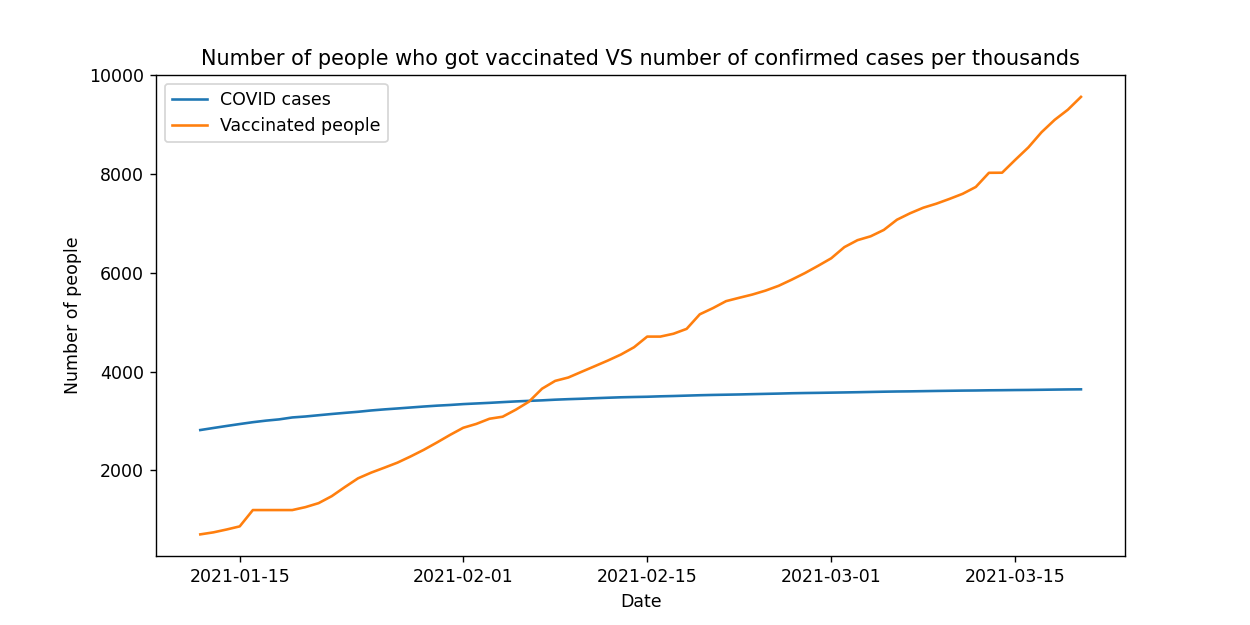

In [18]:
%matplotlib notebook
fig=plt.figure(figsize=(10,5))
plt.plot(df_covid.date.values,final.cases, label='COVID cases')
plt.plot(df_vaccine['date'].values,final['people_vaccinated'], label="Vaccinated people")
plt.xlabel('Date')
plt.ylabel('Number of people')
plt.title('Number of people who got vaccinated VS number of confirmed cases per thousands')
plt.legend()
